In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

<h2>Exer 5.1</h2>

In [2]:
dataset = datasets.MNIST(root="dataset/", download=True)
labels = dataset.targets.numpy()
dataset = dataset.data.numpy().reshape(-1,784).T

In [3]:
U, S, VT = np.linalg.svd(dataset, full_matrices=False)

Text(0.5, 1.0, 'Sigma')

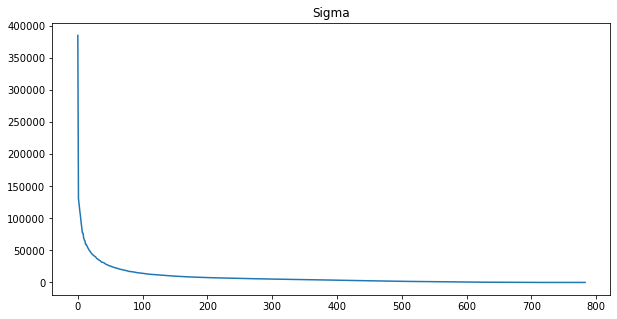

In [19]:
#5.1.a-5.1.c

plt.figure(figsize=(10,5))
plt.plot(S)
plt.title('Sigma')

<p>Seems like Sigma starts to flatten at around 100-150 modes</p>

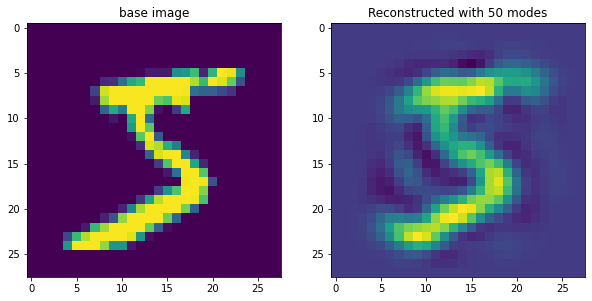

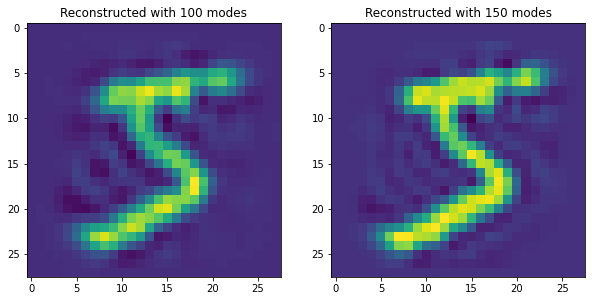

In [25]:
f, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(dataset[:,0].reshape(28,28))
ax[0].set_title('base image')

ax[1].imshow((U[:,:50]@np.diag(S)[:50,:]@VT[:,:50])[:,0].reshape(28,28))
ax[1].set_title('Reconstructed with 50 modes');

f, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow((U[:,:100]@np.diag(S)[:100,:]@VT[:,:100])[:,0].reshape(28,28))
ax[0].set_title('Reconstructed with 100 modes');

ax[1].imshow((U[:,:150]@np.diag(S)[:150,:]@VT[:,:150])[:,0].reshape(28,28))
ax[1].set_title('Reconstructed with 150 modes');

<p>At 100 modes, the image started to take shape and has taken better quality at 150 modes.</p>

<p>Note that U can be seen as the modes/patterns, $\Sigma$ as the singular values, and V as the weights of the modes, .</p>

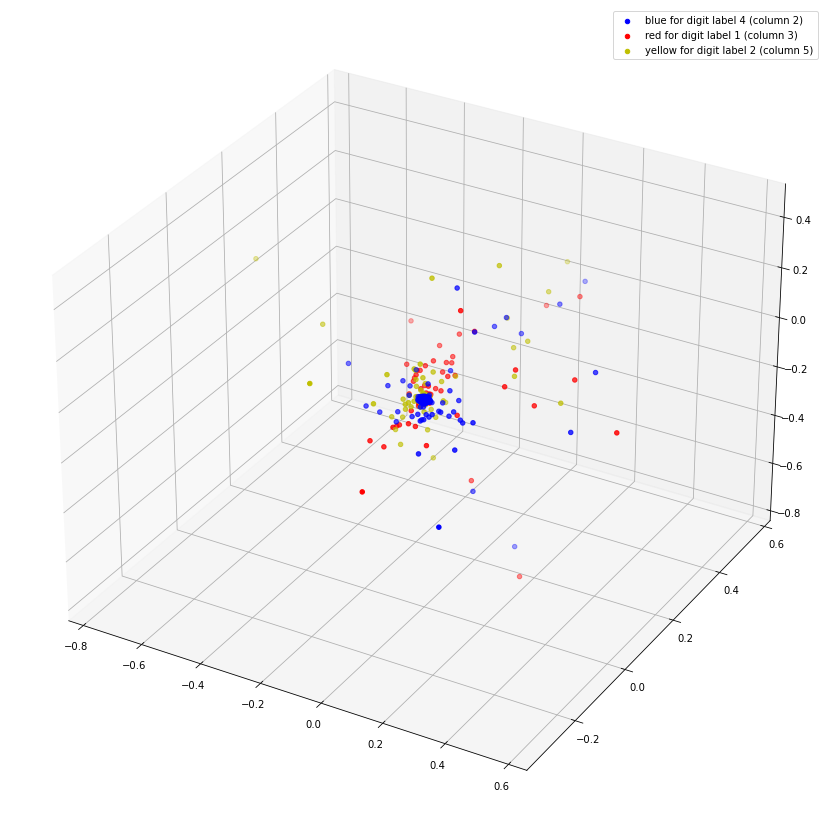

In [29]:
#5.1.d
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.scatter(VT[:,2],VT[:,3],VT[:,5], c='b', label='blue for digit label 4 (column 2)')
ax.scatter(VT[:,3],VT[:,2],VT[:,5], c='r', label='red for digit label 1 (column 3)')
ax.scatter(VT[:,5],VT[:,3],VT[:,2], c='y', label='yellow for digit label 2 (column 5)')
ax.legend();